# Modules import

In [1]:
from typing import Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Piotrek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data import

In [2]:
DATA_PATH = os.path.join('..', 'data', 'original')
train = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))
validation = pd.read_csv(os.path.join(DATA_PATH, 'validation.csv'))
test = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'))
train.head()

,screen_name,text,account.type,class_type
0,bot#9,YEA now that note GOOD,bot,others
1,human#17,Listen to This Charming Man by The Smiths htt...,human,human
2,bot#23,wish i can i would be seeing other hoes on the...,bot,others
3,bot#1,The decade in the significantly easier schedul...,bot,others
4,bot#11,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn


# Simple Checkup

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20712 entries, 0 to 20711
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   screen_name   20712 non-null  object
 1   text          20712 non-null  object
 2   account.type  20712 non-null  object
 3   class_type    20712 non-null  object
dtypes: object(4)
memory usage: 647.4+ KB


In [4]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   screen_name   2302 non-null   object
 1   text          2302 non-null   object
 2   account.type  2302 non-null   object
 3   class_type    2302 non-null   object
dtypes: object(4)
memory usage: 72.1+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   screen_name   2558 non-null   object
 1   text          2558 non-null   object
 2   account.type  2558 non-null   object
 3   class_type    2558 non-null   object
dtypes: object(4)
memory usage: 80.1+ KB


Everything seems to be in order. No missing values.

# Data exploration

In [6]:
dataset_dict = {
    'train': train,
    'validation': validation,
    'test': test
}

## Word occurence

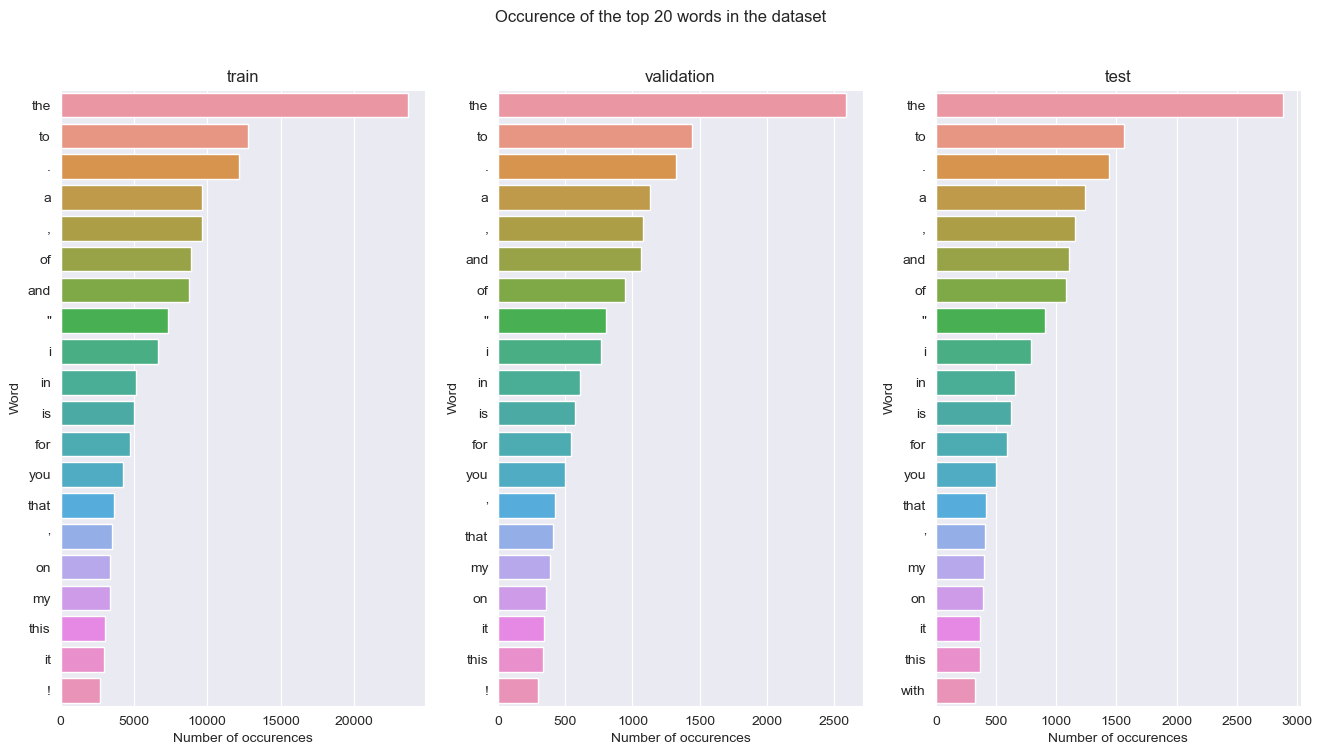

In [7]:
def plot_3_plots_side_by_side(dict_datasets: Dict[str, pd.DataFrame], plot_function: callable):
    fig, axes = plt.subplots(1, 3, figsize=(16, 8))
    for i, (name, dataset) in enumerate(dict_datasets.items()):
        plot_function(dataset, axes[i])
        axes[i].set_title(name)
    return fig
    
def plot_occurence_of_words(dataset: pd.DataFrame, ax: plt.Axes):
    tweet_tokenizer = TweetTokenizer(strip_handles=True)
    tokenized_words = [tweet_tokenizer.tokenize(text) for text in dataset['text']]
    counter = {}
    for text in tokenized_words:
        for word in text:
            counter[word.lower()] = counter.get(word.lower(), 0) + 1
    word_counts = pd.DataFrame(list(counter.items()), columns=['word', 'occurence'])
    word_counts.sort_values(by='occurence', ascending=False, inplace=True)
    sns.barplot(y='word', x='occurence', data=word_counts.iloc[0:20], ax=ax, orient='h')
    ax.set_ylabel('Word')
    ax.set_xlabel('Number of occurences')
    
fig = plot_3_plots_side_by_side(dataset_dict, plot_occurence_of_words)
fig.suptitle('Occurence of the top 20 words in the dataset')
plt.show()

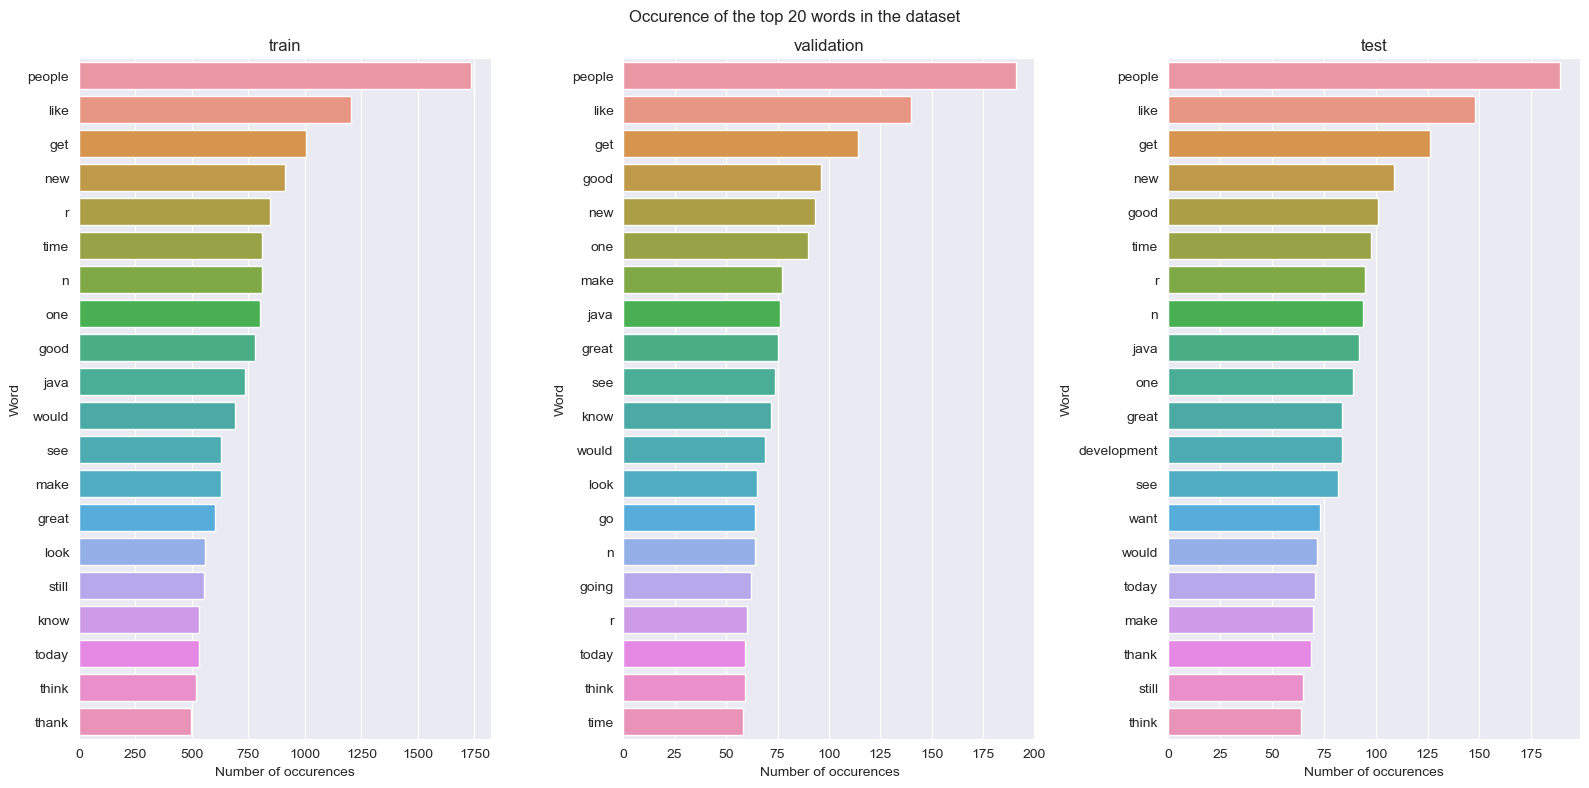

In [8]:
STOPWORDS = set(stopwords.words('english'))
def plot_occurence_of_words_with_stopwords_removed(dataset: pd.DataFrame, ax: plt.Axes):
    tweet_tokenizer = TweetTokenizer(strip_handles=True)
    tokenized_words = [tweet_tokenizer.tokenize(text) for text in dataset['text']]
    counter = {}
    for text in tokenized_words:
        for word in text:
            if word.lower() not in STOPWORDS and word.isalpha():
                counter[word.lower()] = counter.get(word.lower(), 0) + 1
    word_counts = pd.DataFrame(list(counter.items()), columns=['word', 'occurence'])
    word_counts.sort_values(by='occurence', ascending=False, inplace=True)
    sns.barplot(y='word', x='occurence', data=word_counts.iloc[0:20], ax=ax, orient='h')
    ax.set_ylabel('Word')
    ax.set_xlabel('Number of occurences')

fig = plot_3_plots_side_by_side(dataset_dict, plot_occurence_of_words_with_stopwords_removed)
fig.suptitle('Occurence of the top 20 words in the dataset')
fig.tight_layout()
plt.show()

## Class occurence

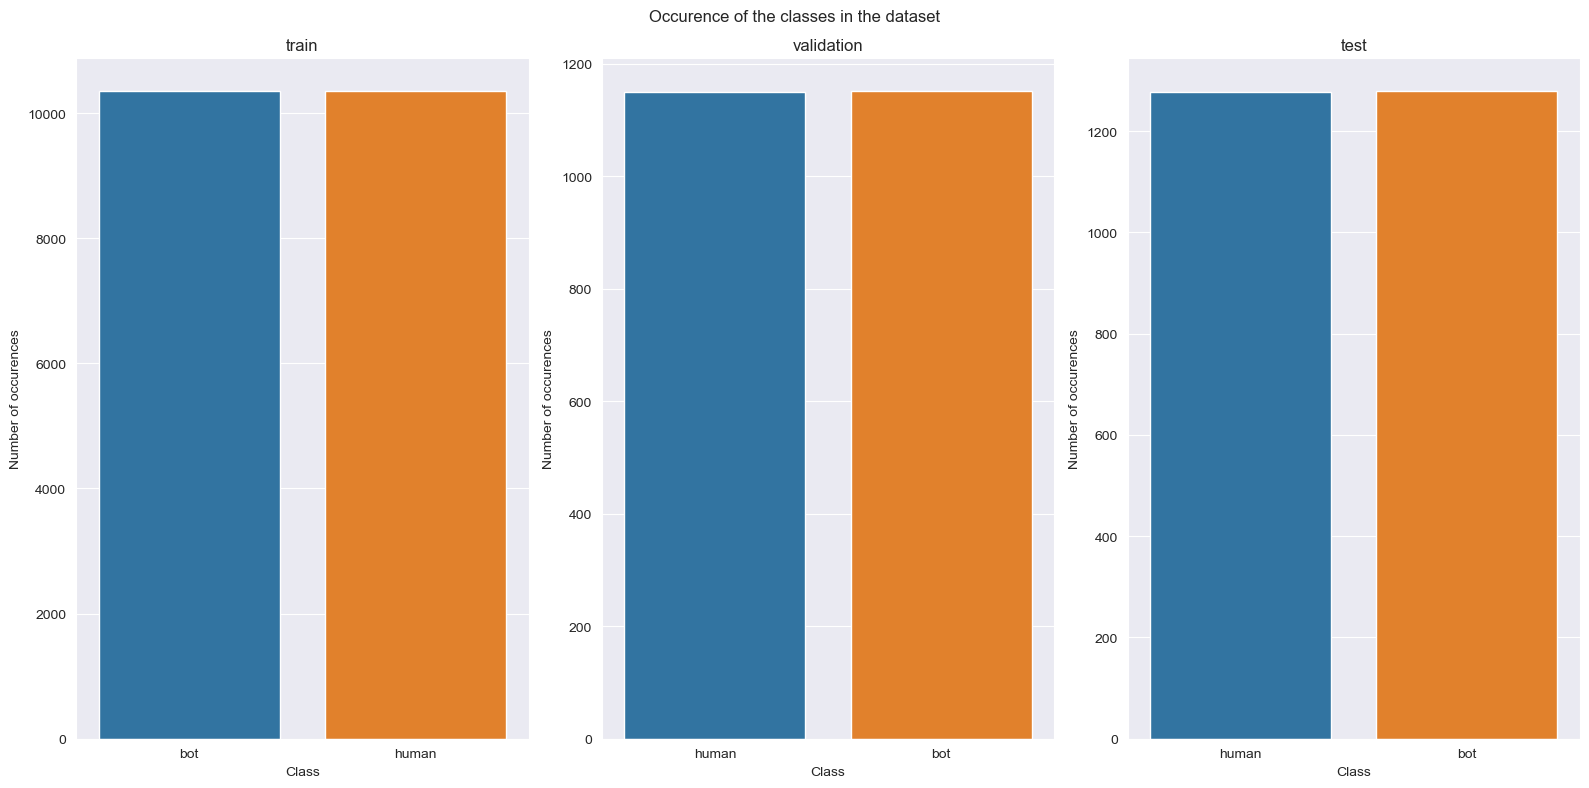

In [9]:
def plot_class_occurence(dataset: pd.DataFrame, ax: plt.Axes):
    sns.countplot(x='account.type', data=dataset, ax=ax)
    ax.set_xlabel('Class')
    ax.set_ylabel('Number of occurences')

fig = plot_3_plots_side_by_side(dataset_dict, plot_class_occurence)
fig.suptitle('Occurence of the classes in the dataset')
fig.tight_layout()
plt.show()

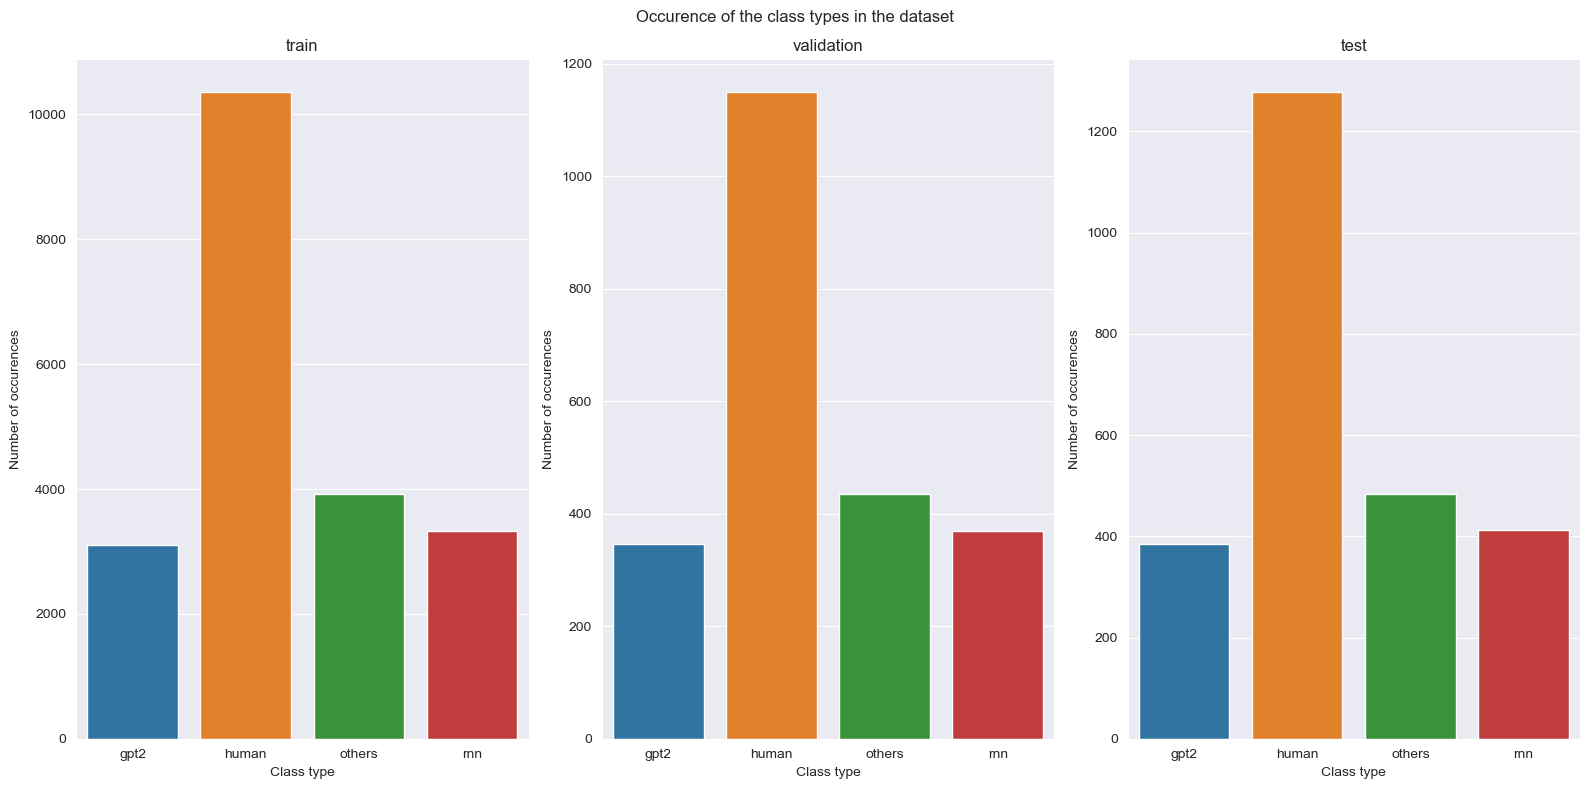

In [10]:
def plot_class_type_occurence(dataset: pd.DataFrame, ax: plt.Axes):
    sns.countplot(x='class_type', data=dataset.sort_values("class_type"), ax=ax)
    ax.set_xlabel('Class type')
    ax.set_ylabel('Number of occurences')

fig = plot_3_plots_side_by_side(dataset_dict, plot_class_type_occurence)
fig.suptitle('Occurence of the class types in the dataset')
fig.tight_layout()
plt.show()

# Sentiment analysis of the tweets

In [11]:
#TODO: Sentiment analysis (subjectivity, polarity, etc.)